###  Практическоe заданиe 2

### Библиотеки

In [6]:
import numpy as np
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import math

### 1. Определить тип данных для каждого из столбцов файла 02_Автоаварии.xls.

In [7]:
PATH = 'E:/data-analytics/lab2/'
data = pd.read_excel(PATH + "02_Автоаварии.xls")
list(data.columns)

['ID',
 'Source',
 'TMC',
 'Severity',
 'Start_Time',
 'End_Time',
 'Distance(mi)',
 'Description',
 'Street',
 'Side',
 'City',
 'State',
 'Zipcode',
 'Weather_Timestamp',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight']

a. Дискретные количественные данные:
* TMC
* Severity
* Weather_Timestamp
* Humidity(%)
* Pressure(in)
* Visibility(mi)


b. Номинальные качественные данные:
* Source
* Description
* Side
* City
* State
* Wind_Direction
* Weather_Condition


c. Ординальные качественные данные:
* ID


d. Качественные данные:
* Description


e. Непрерывные количественные данные:
* Start_Time
* End_Time
* Distance(mi)
* Temperature(F)
* Wind_Chill(F)
* Wind_Speed(mph)
* Precipitation(in)


f. Дихотомические качественные данные:
* Bump
* Crossing
* Give_Way
* Junction
* No_Exit
* Railway
* Roundabout
* Station
* Stop
* Traffic_Calming
* Traffic_Signal
* Turning_Loop
* Sunrise_Sunset
* Civil_Twilight

### 2. Изучить распределение случайных величин – видимость дороги в момент совершения аварии (Visibility) и 1, 2, 3, 4 – видимость дороги в момент совершения аварии степени серьезности 1, 2, 3, 4 (Severity). Выбрать инструмент Python для решения задачи (matplotlib.pyplot.hist(), seaborn.distplot() или seaborn.kdeplot()), построить гистограммы и функции распределения величин

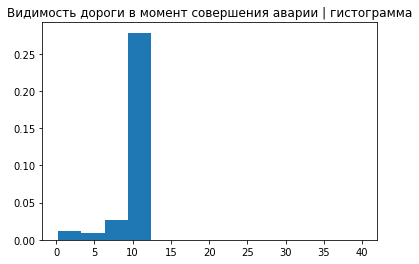

In [8]:
ind = int(math.log(data.shape[0], 2)) + 1
plt.hist(data[["Visibility(mi)"]], bins=ind, density=True)
plt.title("Видимость дороги в момент совершения аварии | гистограмма")
plt.show()

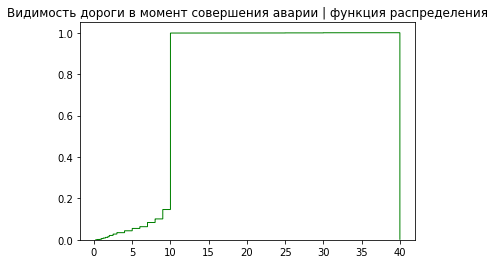

In [9]:
plt.hist(data["Visibility(mi)"], bins=data.shape[0], color='green', cumulative=True, histtype='step', density=True)
plt.title("Видимость дороги в момент совершения аварии | функция распределения")
plt.show()


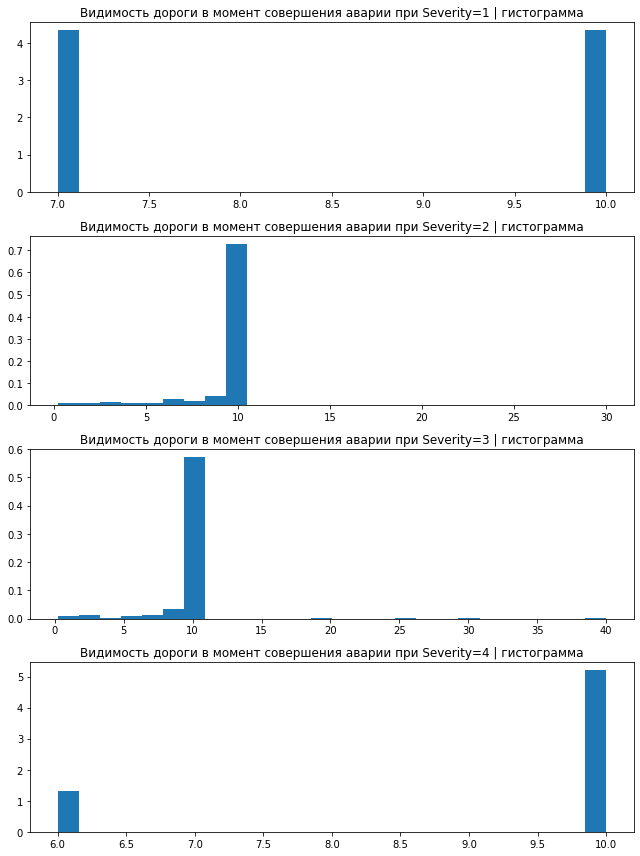

In [10]:
fig, axes = plt.subplots(nrows=4, figsize=(9, 12))
for i in range(4):
 axes[i].hist(data.loc[data["Severity"] == i + 1]["Visibility(mi)"], bins=2*ind, density
=True)
 axes[i].set_title("Видимость дороги в момент совершения аварии при Severity="
 + str(i + 1) + " | гистограмма")
fig.tight_layout()
plt.show()


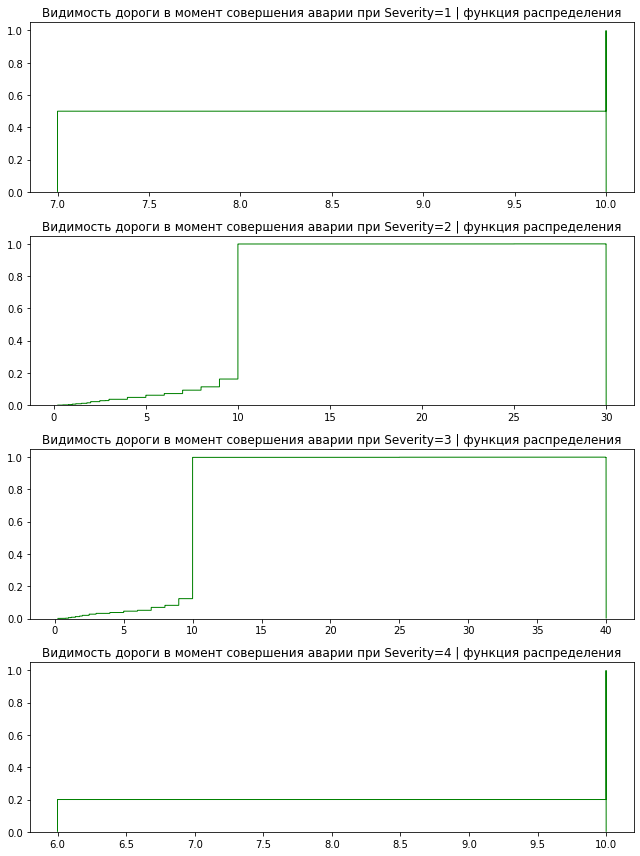

In [11]:
fig, axes = plt.subplots(nrows=4, figsize=(9, 12))
for i in range(4):
 axes[i].hist(data.loc[data["Severity"] == i + 1]["Visibility(mi)"], bins=data.shape[0], color='green',
 cumulative=True, histtype='step', density=True)
 axes[i].set_title("Видимость дороги в момент совершения аварии при Severity="
 + str(i + 1) + " | функция распределения")
fig.tight_layout()
plt.show()

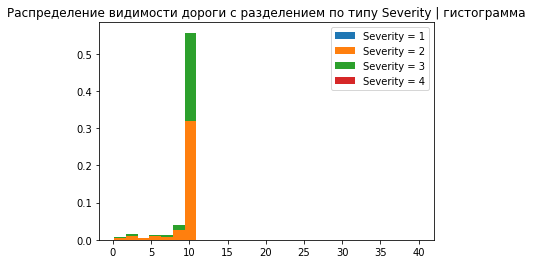

In [12]:
eps = []
labels = []
for i in range(4):
 eps.append(data.loc[data["Severity"] == i + 1]["Visibility(mi)"])
 labels.append("Severity = " + str((i + 1)))
plt.hist(eps, bins=2*ind, label=labels, density=True, histtype='bar', stacked=True)
plt.legend()
plt.title("Распределение видимости дороги с разделением по типу Severity | гистограмма")
plt.show()

### 3. Построить вариационный ряд и статистический ряд для величины – температура воздуха в момент совершения аварии (Temperature),построить группированный статистический ряд.

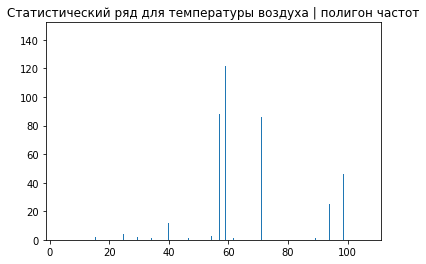

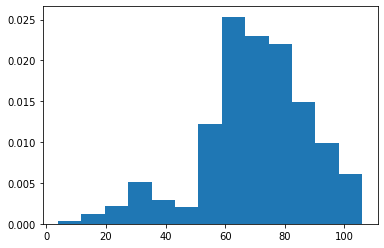

In [13]:
variation_range = list(data["Temperature(F)"])
variation_range.sort()
statistic_range = sorted(Counter(variation_range).items(), key=lambda a : a[0])
plt.hist(variation_range, bins=len(variation_range))
plt.title("Статистический ряд для температуры воздуха | полигон частот")
plt.show()
plt.hist(variation_range, bins=ind, density=True)
plt.show()

### 4. Определить 5 городов с наибольшим количеством автомобильных аварий за наблюдаемый период. Построить функции распределения случайных величин i - протяженность участка дороги, задействованного при аварии (Distance), в i-ом городе из данного списка, i = 1, 2, …, 5

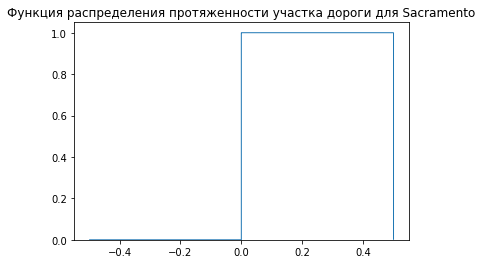

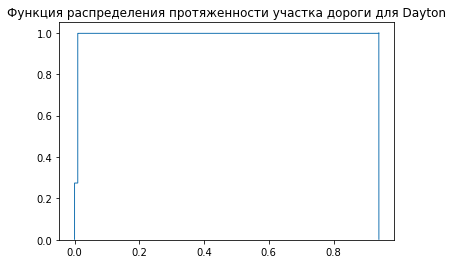

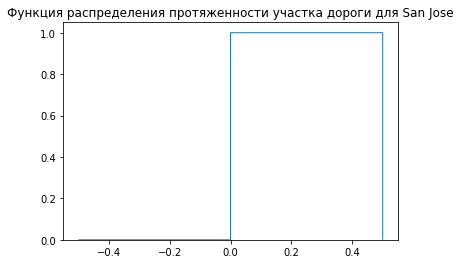

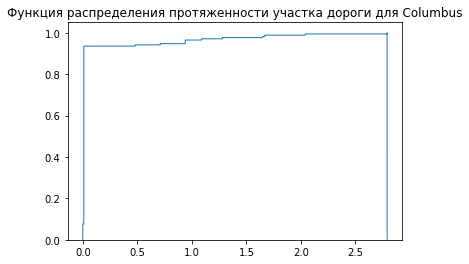

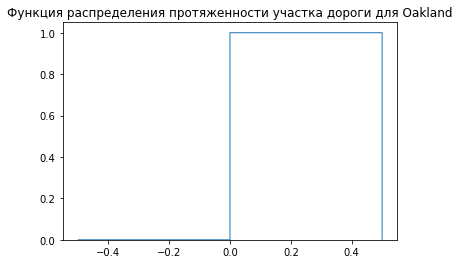

In [21]:
d = list(sorted(Counter(data["City"]).items(), key=lambda a : a[1], reverse=True))
cities = []
for item in d[:5]:
 cities.append(item[0])
for city in cities:
    plt.hist(data.loc[data["City"] == city]["Distance(mi)" ], bins=data.shape[0], cumulative=True, histtype='step', density=True)
    plt.title("Функция распределения протяженности участка дороги для "+city)
    plt.show()

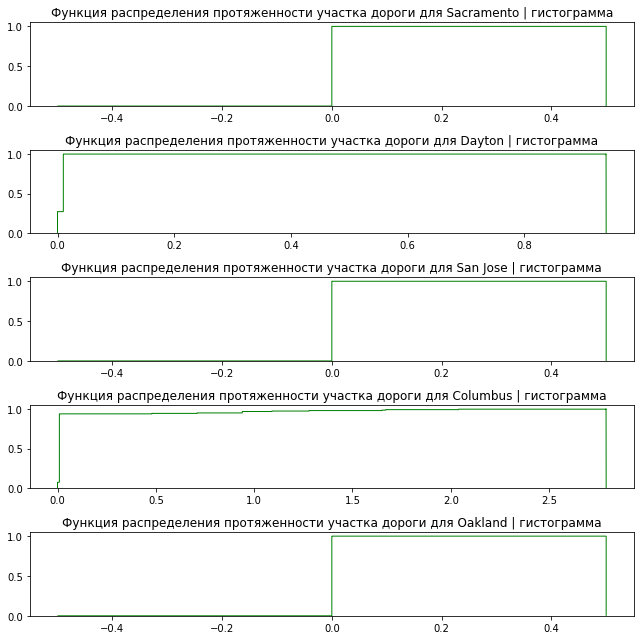

In [15]:
fig, axes = plt.subplots(5, figsize=(9, 9))
for i in range(5):
 axes[i].hist(eps[i], bins=data.shape[0], color='green', cumulative=True, histtype='step', density=True)
 axes[i].set_title("Функция распределения протяженности участка дороги для " + cities[i] +
" | функция распределения")
fig.tight_layout()
plt.show()